[('Amon-Ra St. Brown', Decimal('78')), ('Adam Thielen', Decimal('70')), ('Marquise Brown', Decimal('69')), ("Ja'Marr Chase", Decimal('85')), ('Michael Pittman', Decimal('78')), ('T.J. Hockenson', Decimal('68')), ('Chris Olave', Decimal('77')), ('Puka Nacua', Decimal('89')), ('Davante Adams', Decimal('78')), ('Keenan Allen', Decimal('74')), ('Tyreek Hill', Decimal('87')), ('A.J. Brown', Decimal('83')), ('Garrett Wilson', Decimal('68')), ('Stefon Diggs', Decimal('90')), ('Travis Kelce', Decimal('68'))]


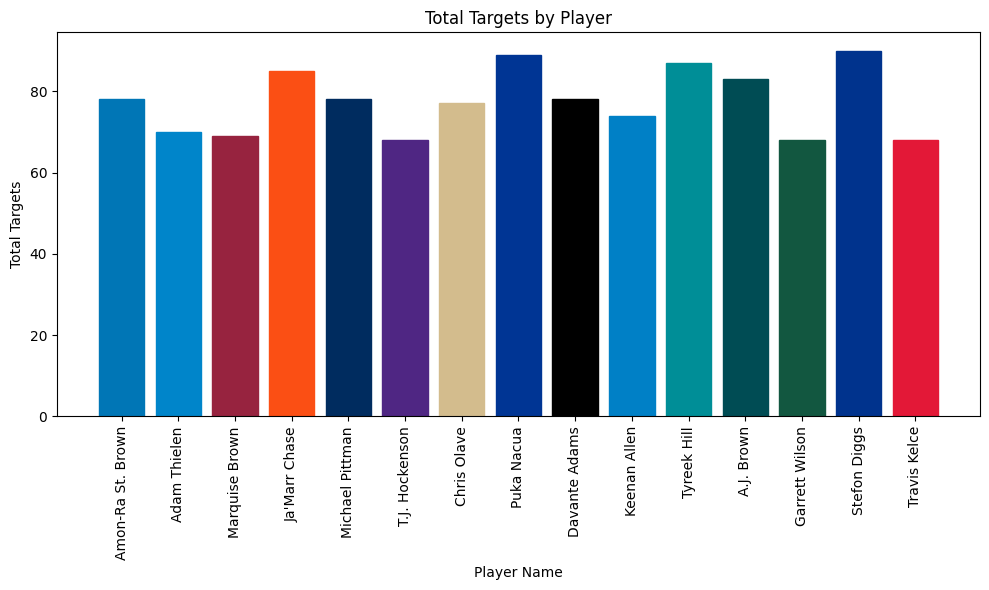

In [1]:
import dotenv
import os
from sqlalchemy import create_engine, func, text
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
from models import ReceivingGameLog, Game, Player

# Load environment variables from the .env file
dotenv.load_dotenv()

DB_USERNAME = os.environ['DB_USERNAME']
DB_PASSWORD = os.environ['DB_PASSWORD']
DB_HOST = os.environ['DB_HOST']
DB_PORT = os.environ['DB_PORT']
DB_NAME = os.environ['DB_NAME']

DB_URL = f"mysql+pymysql://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Create the SQLAlchemy engine
engine = create_engine(DB_URL)

# Create a session
Session = sessionmaker(bind=engine)
session = Session()

query = text("SELECT player_name, SUM(targets) AS total_targets \
    FROM receiving_game_logs \
    GROUP BY player_name \
    HAVING total_targets > 65")

# Execute the raw query
results = session.execute(query).fetchall()
print(results)

team_colors = ["#0076B6", "#0085CA", "#97233F", "#FB4F14", "#002C5F", "#4F2683", "#D3BC8D", "#003594", "#000000", "#0080C6", "#008E97", "#004C54", "#125740", "#00338D", "#E31837"]
# DET, CAR, ARI, CIN, IND, MIN, NO, LAR, LV, LAC, MIA, PHI, NYJ, BUF, KC

# Extract data for the plot
player_names = [result.player_name for result in results]
total_targets = [result.total_targets for result in results]

# Create a bar plot
plt.figure(figsize=(10, 6))
# plt.bar(player_names, total_targets)
bars = plt.bar(player_names, total_targets)
for bar, team_color in zip(bars, team_colors):
    bar.set_color(team_color)
plt.xlabel('Player Name')
plt.ylabel('Total Targets')
plt.title('Total Targets by Player')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

# Close the session
session.close()